In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
%matplotlib inline

# Data Exploration

In [56]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [57]:
data.shape

(545, 13)

# Summary

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Statistical summary

In [59]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [60]:
# Check For null values
data.isnull().count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

<AxesSubplot:>

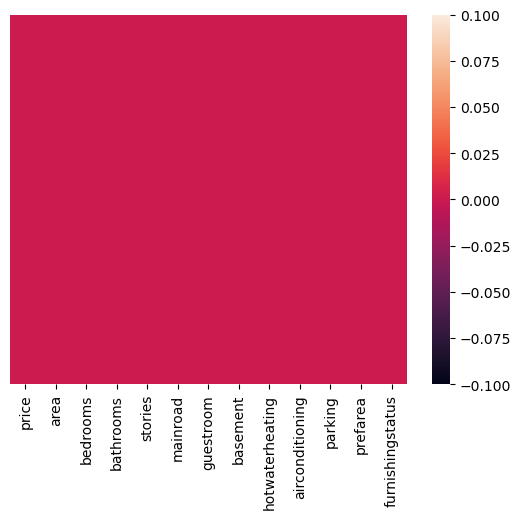

In [61]:
sns.heatmap(data.isnull(),yticklabels=False)

### There are no NULL values in the dataset, hence it is clean.

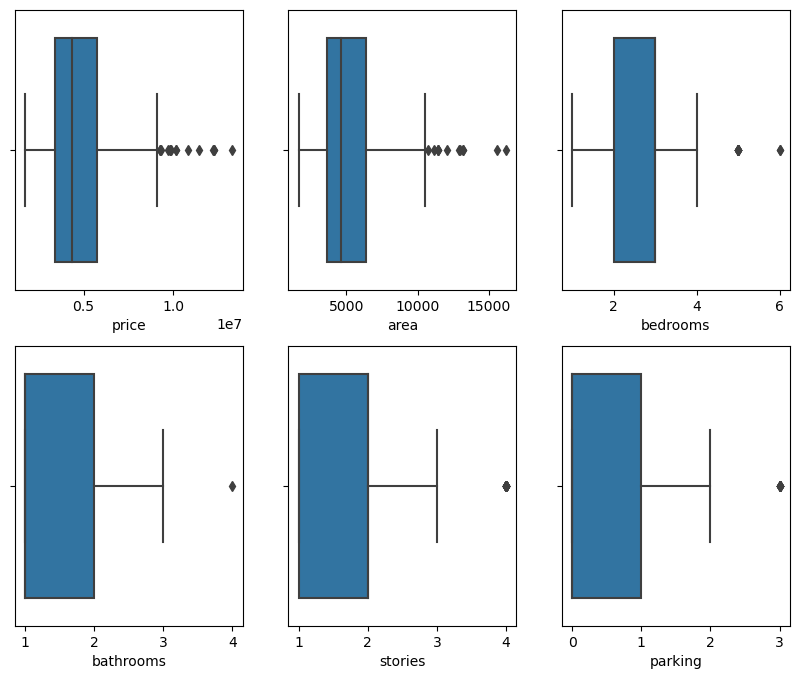

In [62]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,8))
plt1 = sns.boxplot(x = data['price'], ax = axs[0,0])
plt2 = sns.boxplot(x = data['area'], ax = axs[0,1])
plt3 = sns.boxplot(x = data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(x = data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(x = data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(x = data['parking'], ax = axs[1,2])

# Outlier Treatment
### Price and area have considerable outliers.
### We can drop the outliers as we have sufficient data.

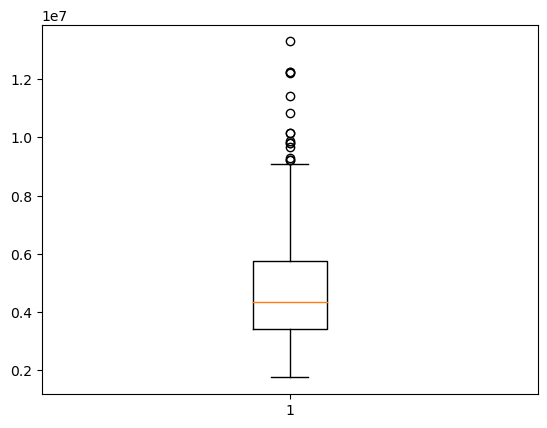

In [63]:
# outlier treatment for price
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

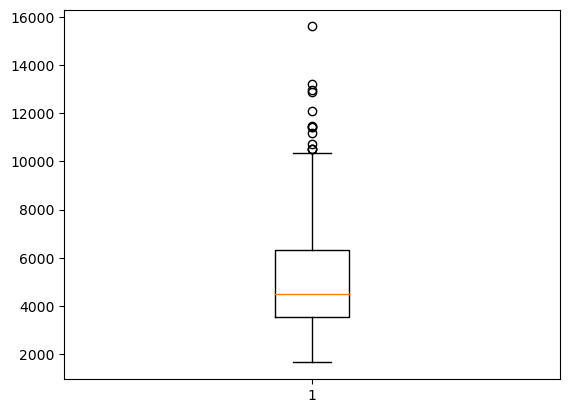

In [64]:
# outlier treatment for area
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

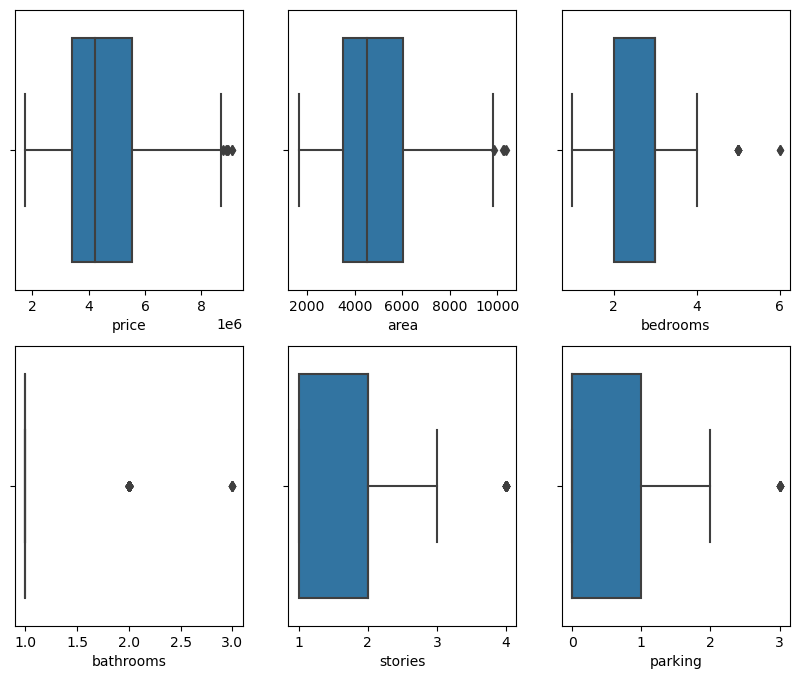

In [65]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,8))
plt1 = sns.boxplot(x = data['price'], ax = axs[0,0])
plt2 = sns.boxplot(x = data['area'], ax = axs[0,1])
plt3 = sns.boxplot(x = data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(x = data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(x = data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(x = data['parking'], ax = axs[1,2])

# Visualize numerical features

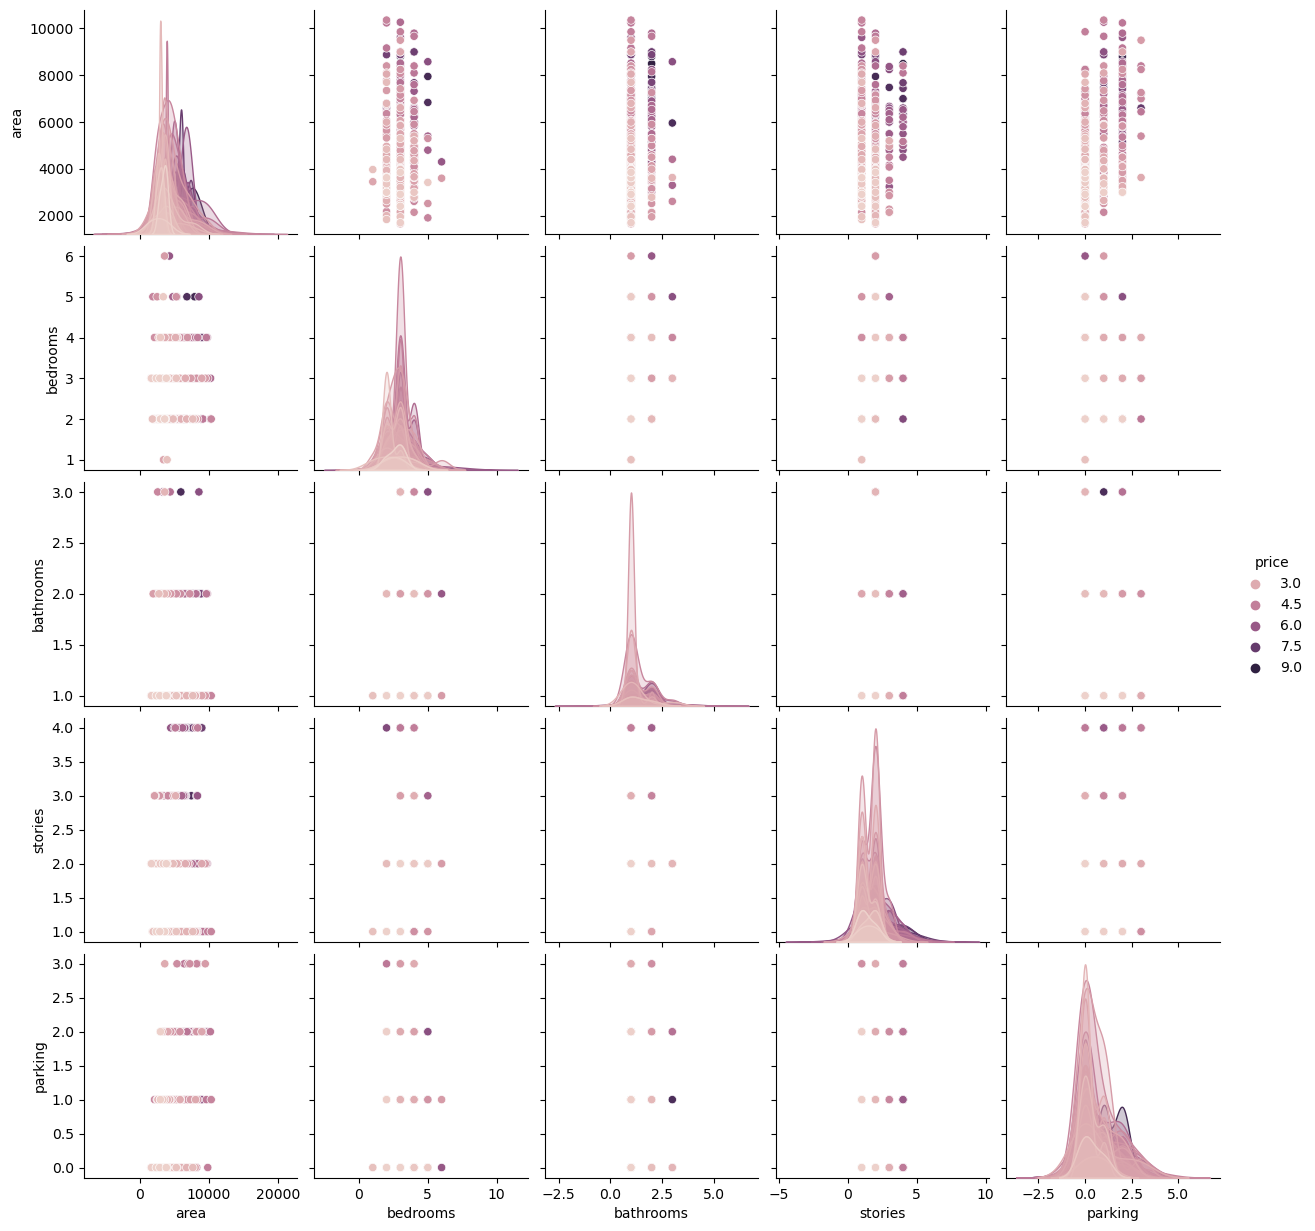

In [66]:
sns.pairplot(data, hue='price')

# Visualize categorical features

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

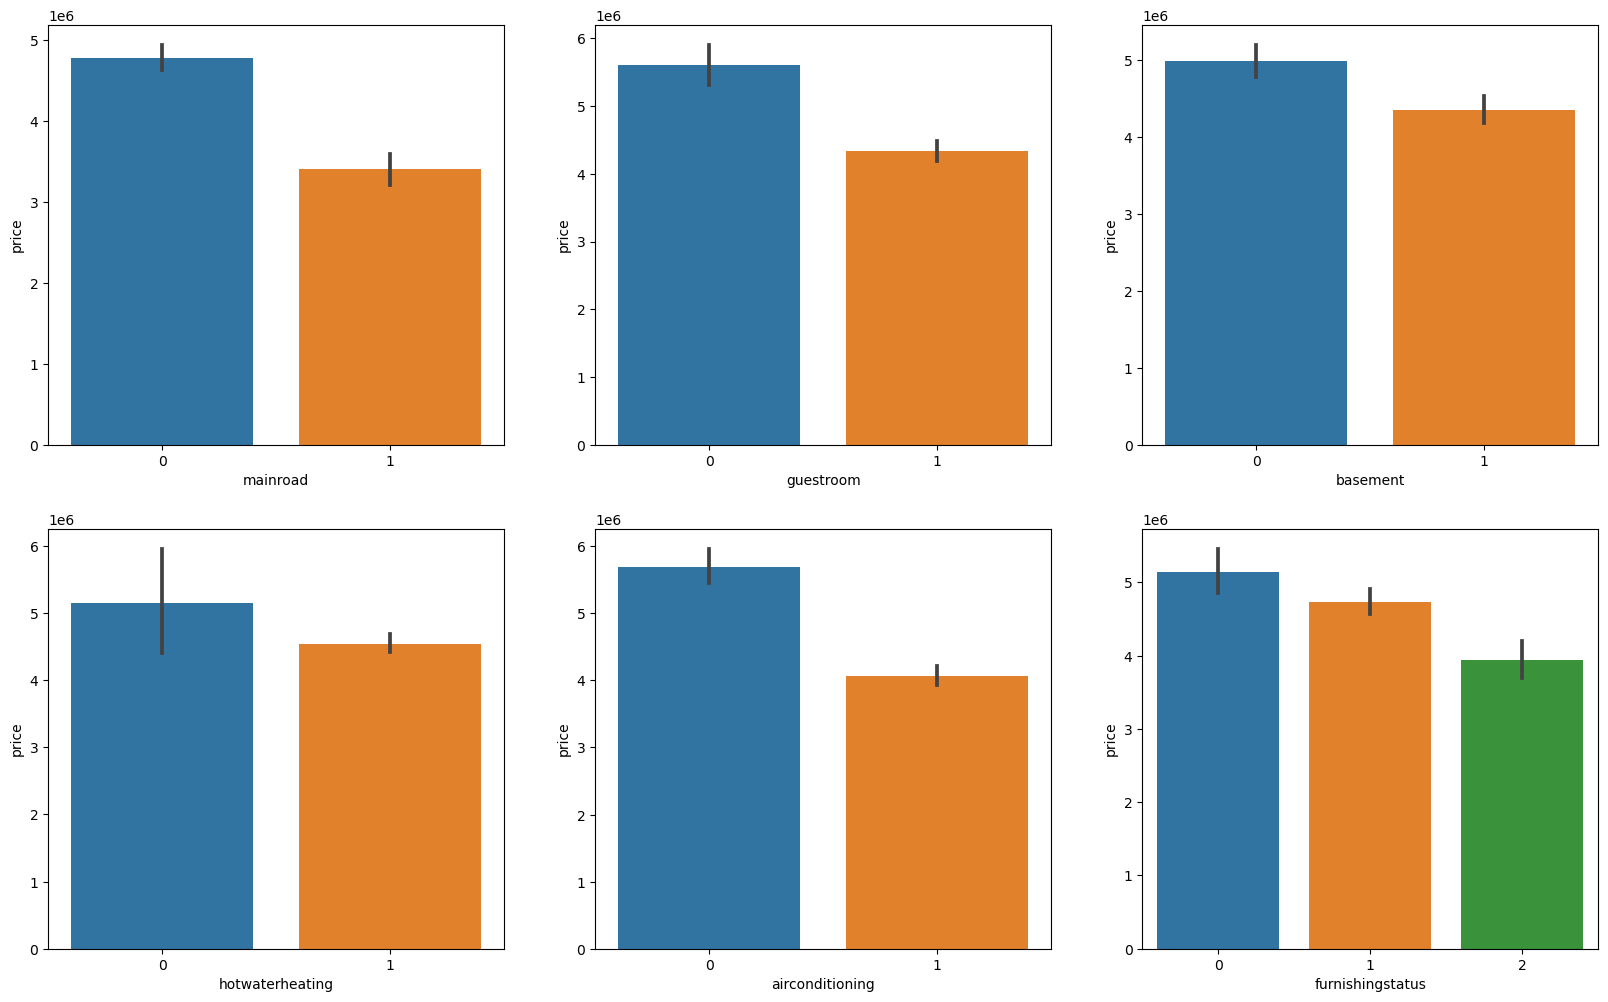

In [117]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.barplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.barplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.barplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.barplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.barplot(x = 'furnishingstatus', y = 'price', data = data)

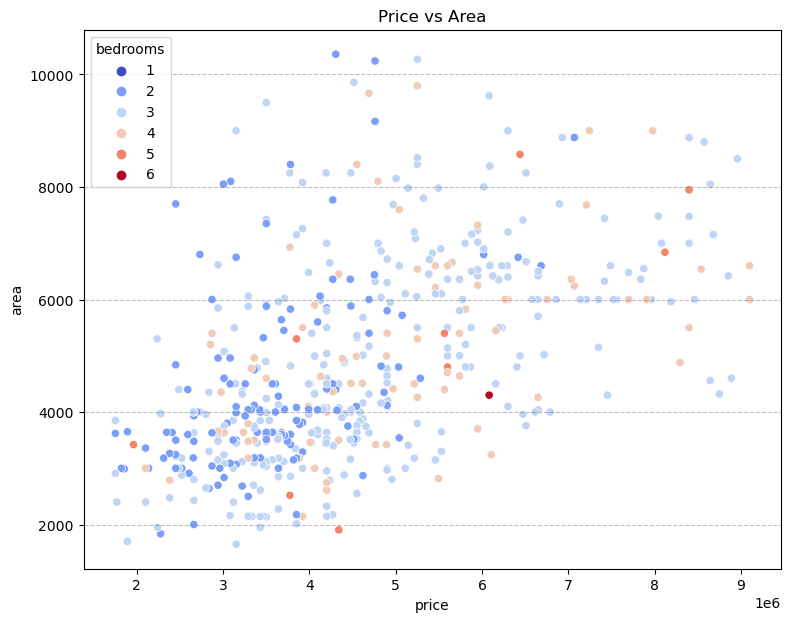

In [118]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='price',y='area',hue='bedrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area')
plt.show()

Text(0.5, 1.0, 'Price vs Area')

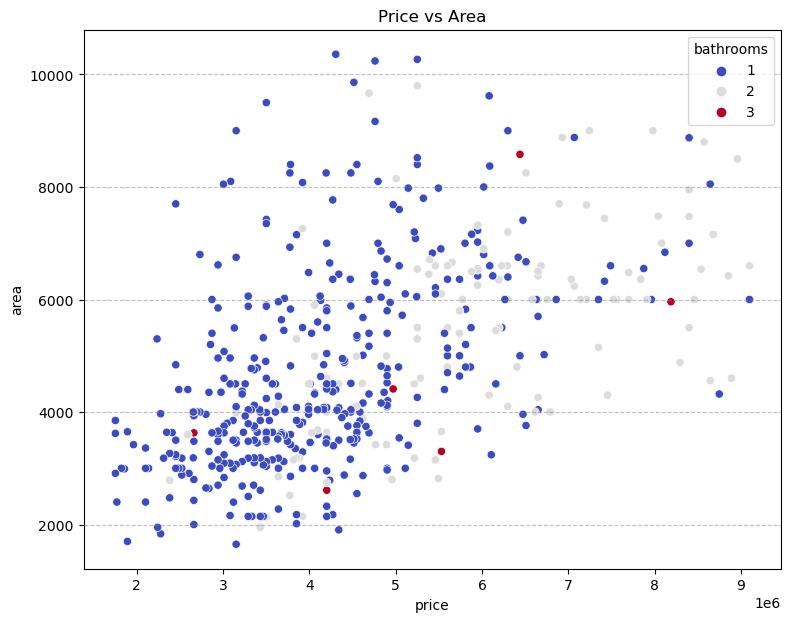

In [119]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data,x='price',y='area',hue='bathrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area')

# Data Encoding
## Convert categorical data into numbers

In [68]:
data['mainroad'] = data['mainroad'].map({'yes' : 0, 'no': 1})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,0,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,0,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,0,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,0,no,no,no,yes,1,yes,semi-furnished


In [69]:
data['guestroom'] = data['guestroom'].map({'yes' : 0, 'no': 1})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,0,0,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,0,1,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,0,0,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,0,1,no,no,yes,1,yes,semi-furnished


In [70]:
data['basement'] = data['basement'].map({'yes' : 0, 'no': 1})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,0,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,0,0,0,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,0,1,1,no,yes,2,no,furnished
18,8890000,4600,3,2,2,0,0,1,no,yes,2,no,furnished
19,8855000,6420,3,2,2,0,1,1,no,yes,1,yes,semi-furnished


In [71]:
data['hotwaterheating'] = data['hotwaterheating'].map({'yes' : 0, 'no': 1})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,0,1,no,2,no,semi-furnished
16,9100000,6600,4,2,2,0,0,0,1,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,0,1,1,1,yes,2,no,furnished
18,8890000,4600,3,2,2,0,0,1,1,yes,2,no,furnished
19,8855000,6420,3,2,2,0,1,1,1,yes,1,yes,semi-furnished


In [72]:
data['airconditioning'] = data['airconditioning'].map({'yes' : 0, 'no': 1})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,0,1,1,2,no,semi-furnished
16,9100000,6600,4,2,2,0,0,0,1,0,1,yes,unfurnished
17,8960000,8500,3,2,4,0,1,1,1,0,2,no,furnished
18,8890000,4600,3,2,2,0,0,1,1,0,2,no,furnished
19,8855000,6420,3,2,2,0,1,1,1,0,1,yes,semi-furnished


In [73]:
data['prefarea'] = data['prefarea'].map({'yes' : 0, 'no': 1})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,0,1,1,2,1,semi-furnished
16,9100000,6600,4,2,2,0,0,0,1,0,1,0,unfurnished
17,8960000,8500,3,2,4,0,1,1,1,0,2,1,furnished
18,8890000,4600,3,2,2,0,0,1,1,0,2,1,furnished
19,8855000,6420,3,2,2,0,1,1,1,0,1,0,semi-furnished


In [74]:
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished' : 0, 'semi-furnished': 1, 'unfurnished': 2})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,0,1,1,2,1,1
16,9100000,6600,4,2,2,0,0,0,1,0,1,0,2
17,8960000,8500,3,2,4,0,1,1,1,0,2,1,0
18,8890000,4600,3,2,2,0,0,1,1,0,2,1,0
19,8855000,6420,3,2,2,0,1,1,1,0,1,0,1


# Check Correlation

<AxesSubplot:>

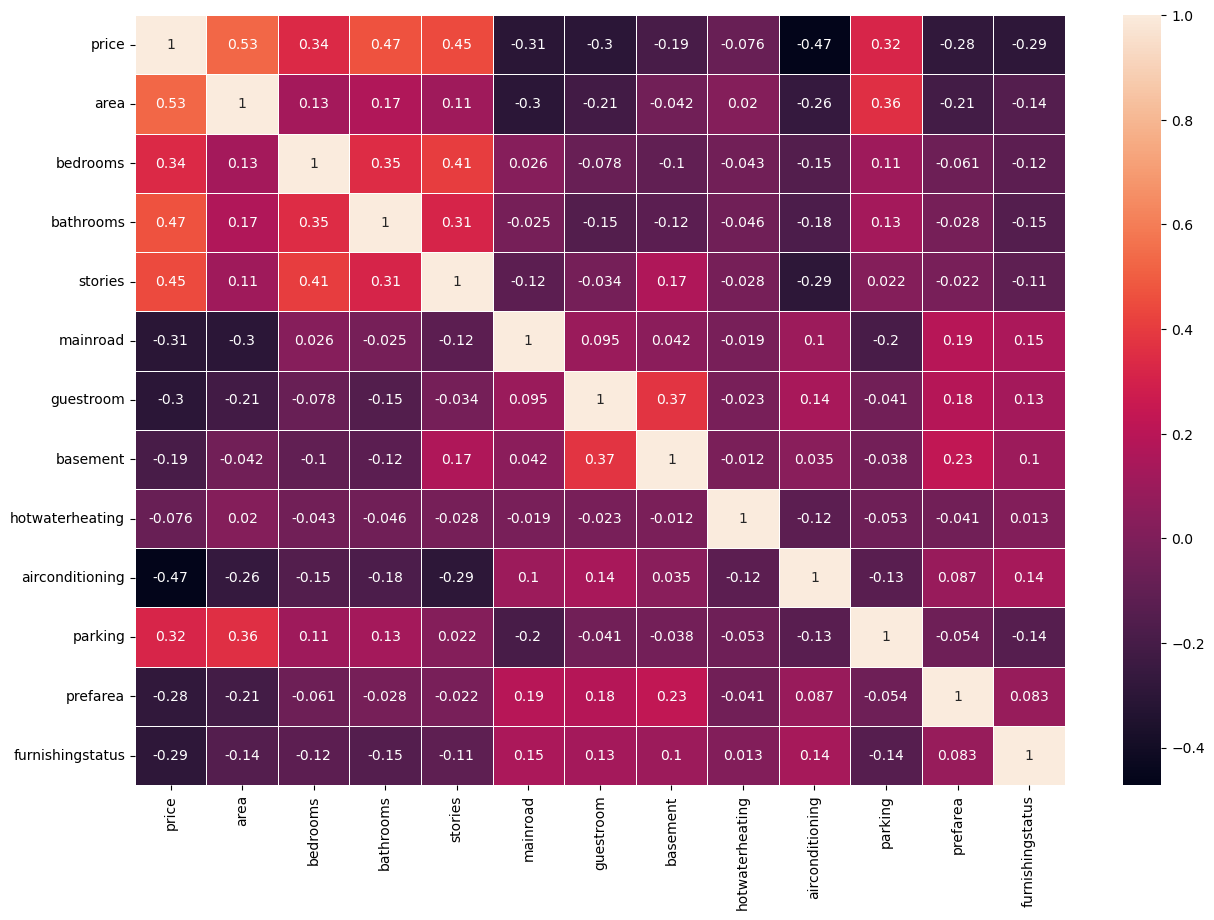

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

### Area has the strongest correlation with price
### bedroom, bathroom, stroires, and parking have strong correlation with price
### while remaining features have negative (Weak) correlation with price

# Multivariate Linear Regression
# Define the features and target variable

In [120]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

## Split the data into training and testing sets

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit the model

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict house prices

In [123]:
y_pred = model.predict(X_test)

## Evaluate the model

In [124]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared value: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 1258496156539.44
R-squared value: 0.57


## Visualize the model

<AxesSubplot:xlabel='price'>

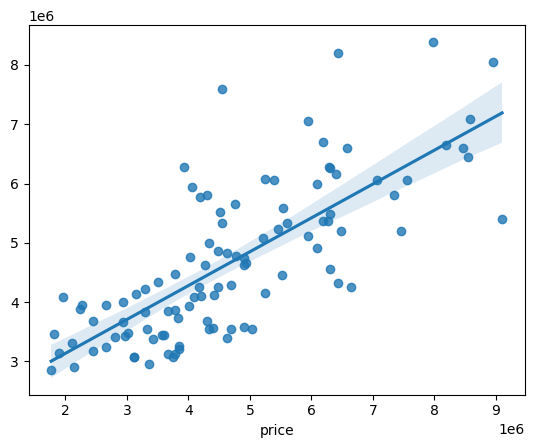

In [125]:
sns.regplot(x=y_test, y=y_pred)

# Univariate Linear Regression
## Define the features and target variable

In [96]:
X = data['area'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

## Split the data into training and testing sets

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit the model

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## preddict house prices

In [99]:
y_pred = model.predict(X_test)

## Evaluate the model

In [100]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared value: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 1933129524837.93
R-squared value: 0.34


## Visualize The Model

<AxesSubplot:>

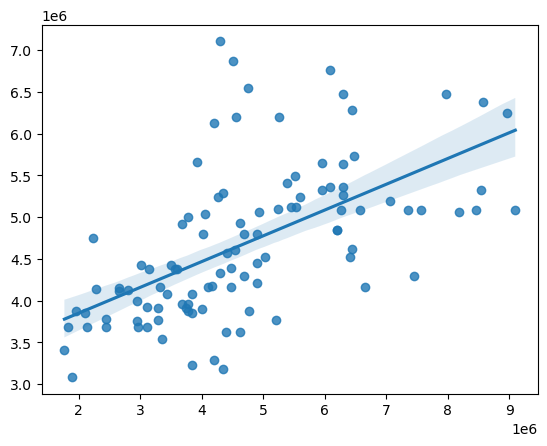

In [101]:
sns.regplot(x=y_test, y=y_pred)

# Multivariate linear regression with all features
## Define the features and target variable

In [ ]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = data['price']

## Split the data into training and testing sets

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit the model

In [105]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict house prices

In [106]:
y_pred = model.predict(X_test)

## Evaluate the model

In [110]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared value: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 977664860283.97
R-squared value: 0.67


# Visualize the model

<AxesSubplot:xlabel='price'>

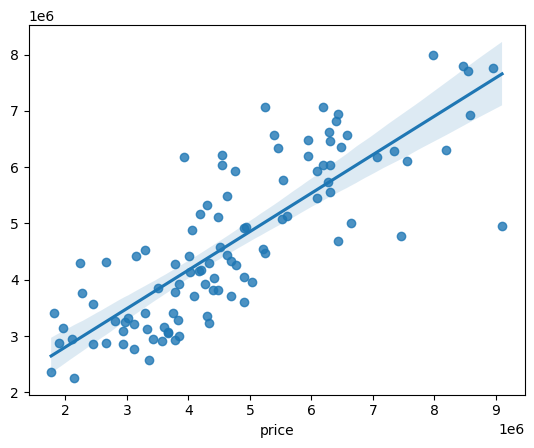

In [108]:
sns.regplot(x=y_test, y=y_pred)